In [30]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds

In [31]:
Iris = ds.load_iris()
# Iris.data (features) is fed into the model to make predictions.
# Assigning feature data to xdata
xdata = Iris.data.astype(np.float32)
# Iris.target (labels) is used to calculate the loss and accuracy during training and testing.
# Assigning target labels to tdata
tdata = Iris.target.astype(np.int32)

In [32]:
print(xdata)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [33]:
print(tdata)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [34]:
# Determine the dimensions of the data
D,N = xdata.shape
Dtrain = D // 2

In [35]:
# Randomly shuffle the data
index = np.random.permutation(range(D))
xtrain = xdata[index[0:Dtrain], :]
ttrain = tdata[index[0:Dtrain]]
xtest = xdata[index[Dtrain:D], :]
ttest = tdata[index[Dtrain:D]]

In [36]:
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable, Chain, config

In [37]:
# Define the neural network
# Add offset 1, how many kinds of Iris
C = np.max(tdata) + 1 # C == 8
NN = Chain(l1 = L.Linear(N, 3), l2 = L.Linear(3, 3), l3 = L.Linear(3, C))

In [38]:
def model(x):
    h = NN.l1(x)
    h = F.sigmoid(h)
    f = NN.l2(h)
    h = F.sigmoid(h)
    y = NN.l3(h)
    return y

In [39]:
# Set up the optimizer
optNN = Opt.SGD()
optNN.setup(NN)

#Store result
train_loss = []
train_acc = []
test_loss = []
test_acc = []

In [40]:
T = 1000
for time in range(T):
    config.train = True
    optNN.target.zerograds()
    ytrain = model(xtrain)
    loss_train = F.softmax_cross_entropy(ytrain, ttrain)
    acc_train = F.accuracy(ytrain, ttrain)
    
    # Backpropagation
    loss_train.backward()
    optNN.update()

    # Store the training loss
    # Evaluate accuracy on the training data
    config.train = False
    ytest = model(xtest)
    loss_test = F.softmax_cross_entropy(ytest, ttest)
     
    # Evaluate accuracy on the training data
    acc_test = F.accuracy(ytest, ttest)
    train_loss.append(loss_train.data)
    train_acc.append(acc_train.data)
    test_loss.append(loss_test.data)
    test_acc.append(acc_test.data)

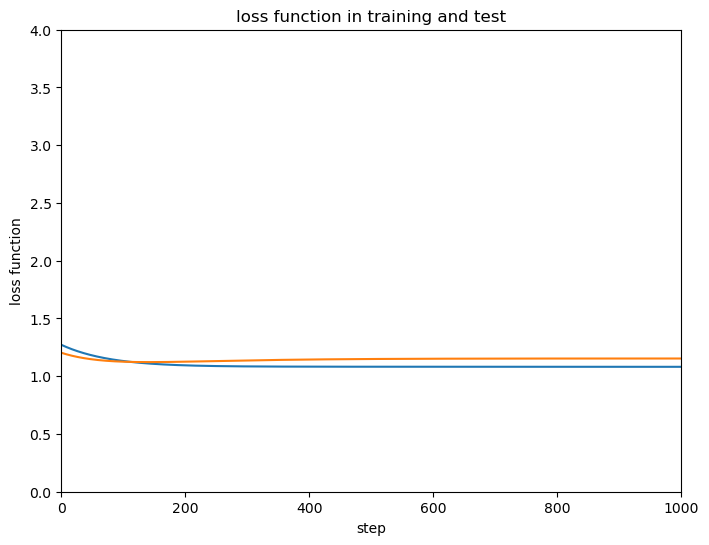

In [41]:
Tall = len(train_loss)
plt.figure(figsize=(8,6))
plt.plot(range(Tall), train_loss)
plt.plot(range(Tall), test_loss)
plt.title("loss function in training and test")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0, Tall])
plt.ylim([0, 4])
plt.show()

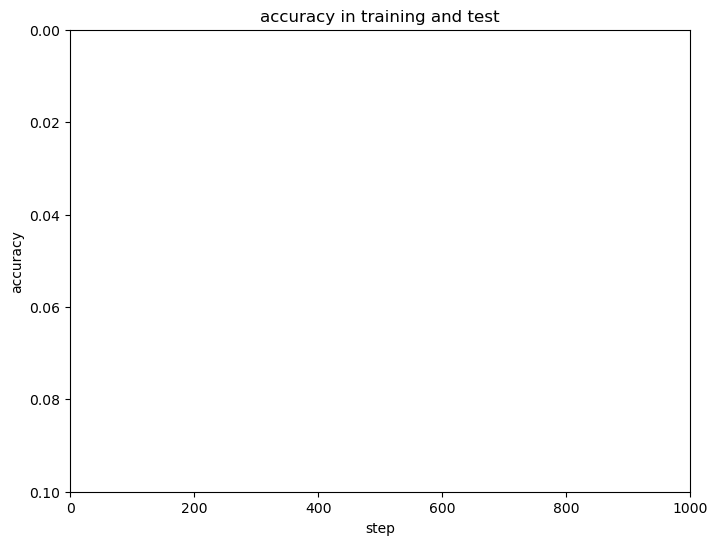

In [42]:
Tall = len(train_acc)
plt.figure(figsize=(8,6))
plt.plot(range(Tall), train_acc)
plt.plot(range(Tall), test_acc)
plt.title("accuracy in training and test")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0, Tall])
plt.ylim([0.1, 0])
plt.show()